# Adult income salary predictions

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('adult.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
#Changing the columns name having '-' into '_' to ease the computation
col = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

for ind, val in enumerate(col):
    for j in val:
        if '-' in j:
           col[ind] = val.replace('-', '_')

In [8]:
# Reassagning the new names to the data frame
data.columns = col
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
np.unique (data.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [10]:
np.unique (data.education)

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [11]:
np.unique (data.occupation)

array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving'], dtype=object)

## Dependant variable analysis

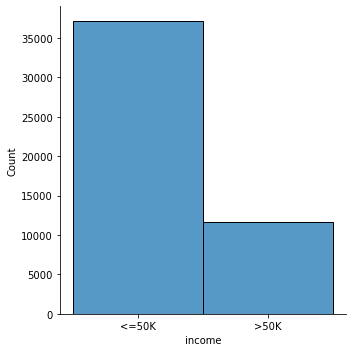

In [12]:
sns.displot(data.income)

There are 2 classes of incomes with a clear dominance of the 'less than 50k'

### Continuous features analysis

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

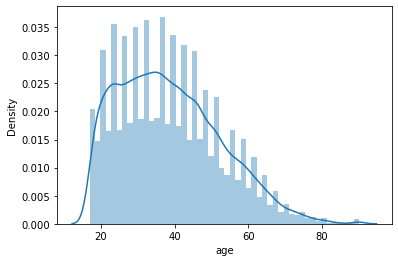

In [13]:
sns.distplot(data.age)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educational_num', ylabel='Density'>

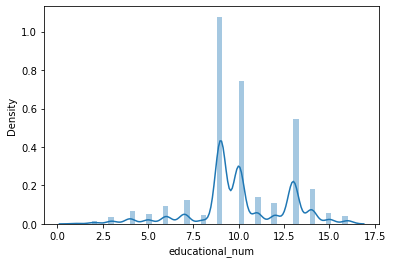

In [14]:
sns.distplot(data.educational_num)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


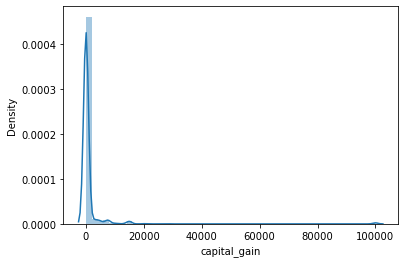

In [15]:
ax = sns.distplot(data.capital_gain)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


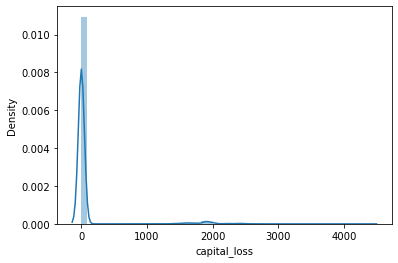

In [16]:
ax = sns.distplot(data.capital_loss)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_per_week', ylabel='Density'>

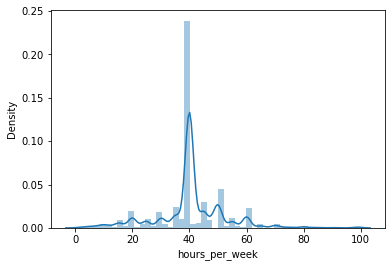

In [17]:
sns.distplot(data.hours_per_week)

In [18]:
col_object = ['workclass', 'education',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
        'native_country']

<AxesSubplot:xlabel='count', ylabel='native_country'>

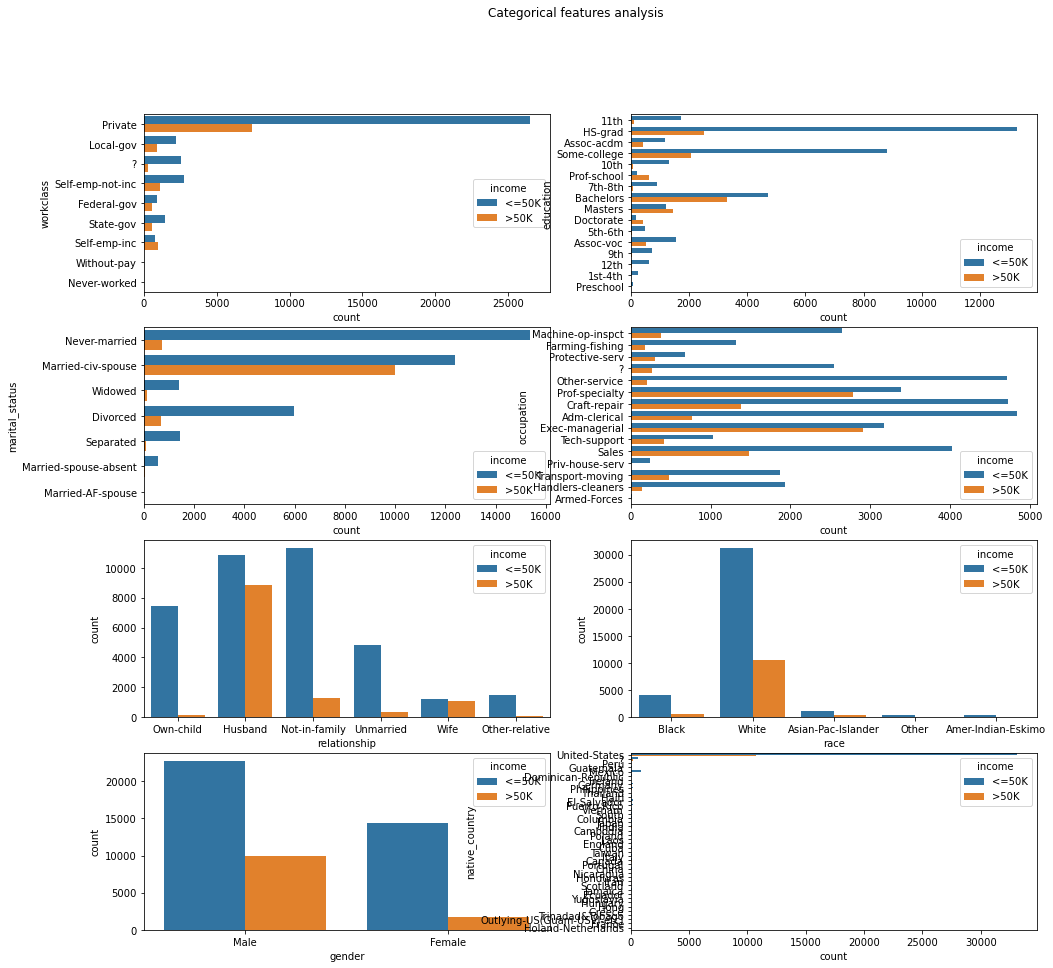

In [19]:
fig, axes = plt.subplots(4, 2, figsize = (16,15))
fig.suptitle('Categorical features analysis')
sns.countplot(ax = axes[0,0], y = 'workclass', hue = 'income', data = data)
sns.countplot(ax = axes[0,1], y = 'education', hue = 'income', data = data)
sns.countplot(ax = axes[1,0], y = 'marital_status', hue = 'income', data = data)
sns.countplot(ax = axes[1,1], y = 'occupation', hue = 'income', data = data)
sns.countplot(ax = axes[2,0], x = 'relationship', hue = 'income', data = data)
sns.countplot(ax = axes[2,1], x = 'race', hue = 'income', data = data)
sns.countplot(ax = axes[3,0], x = 'gender', hue = 'income', data = data)
sns.countplot(ax = axes[3,1], y = 'native_country', hue = 'income', data = data)

In [20]:
df = pd.get_dummies(data)
df.columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=110)

In [21]:
corr = df.corr()

In [22]:
income = corr['income_>50K']
rel = income.sort_values(ascending = False)
rel = pd.DataFrame(rel)

In [23]:
rel.head(20)

,income_>50K
income_>50K,1.000000
marital_status_Married-civ-spouse,0.445853
relationship_Husband,0.403791
educational_num,0.332613
age,0.230369
hours_per_week,0.227687
capital_gain,0.223013
gender_Male,0.214628
occupation_Exec-managerial,0.210938
occupation_Prof-specialty,0.188793


In [24]:
rel.tail(20)

,income_>50K
occupation_Machine-op-inspct,-0.069936
education_10th,-0.070837
marital_status_Separated,-0.073583
workclass_Private,-0.075625
workclass_?,-0.083567
occupation_?,-0.083921
occupation_Handlers-cleaners,-0.085189
relationship_Other-relative,-0.085601
occupation_Adm-clerical,-0.086475
education_11th,-0.086728


In [25]:
df_wm = data[data['gender']=='Female']

<AxesSubplot:xlabel='count', ylabel='native_country'>

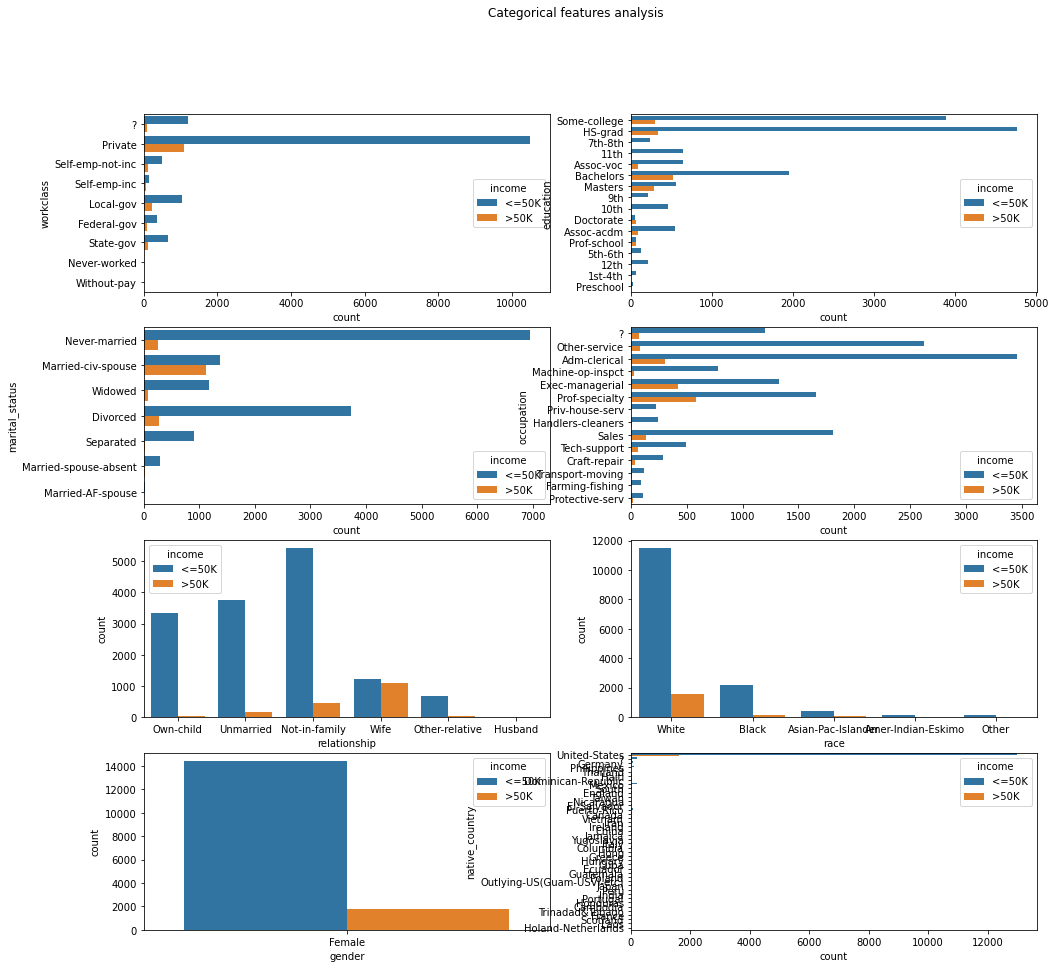

In [26]:
fig, axes = plt.subplots(4, 2, figsize = (16,15))
fig.suptitle('Categorical features analysis')
sns.countplot(ax = axes[0,0], y = 'workclass', hue = 'income', data = df_wm)
sns.countplot(ax = axes[0,1], y = 'education', hue = 'income', data = df_wm)
sns.countplot(ax = axes[1,0], y = 'marital_status', hue = 'income', data = df_wm)
sns.countplot(ax = axes[1,1], y = 'occupation', hue = 'income', data = df_wm)
sns.countplot(ax = axes[2,0], x = 'relationship', hue = 'income', data = df_wm)
sns.countplot(ax = axes[2,1], x = 'race', hue = 'income', data = df_wm)
sns.countplot(ax = axes[3,0], x = 'gender', hue = 'income', data = df_wm)
sns.countplot(ax = axes[3,1], y = 'native_country', hue = 'income', data = df_wm)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educational_num', ylabel='Density'>

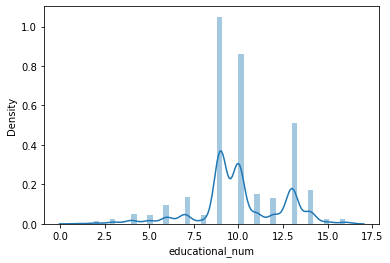

In [27]:
sns.distplot(df_wm.educational_num)

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_per_week', ylabel='Density'>

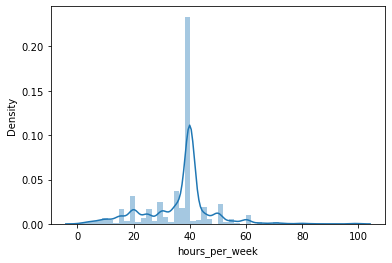

In [28]:
sns.distplot(df_wm.hours_per_week)

In [29]:
df_men = data[data['gender'] == 'Male']

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

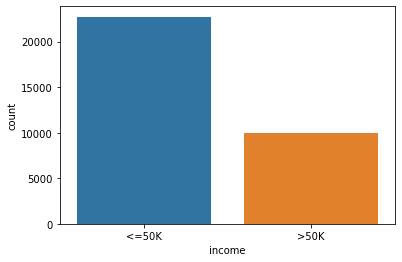

In [30]:
sns.countplot(df_men.income)

In [31]:
women = df_wm.income.value_counts()

In [32]:
men = df_men.income.value_counts()

In [33]:
gap = pd.DataFrame([women, men], index = ['women', 'men'])

In [34]:
gap.head()

,<=50K,>50K
women,14423,1769
men,22732,9918


In [35]:
gap['total'] = gap['>50K'] + gap['<=50K']
gap['weight'] = gap['>50K'] / gap['total']

In [36]:
gap.head()

,<=50K,>50K,total,weight
women,14423,1769,16192,0.109251
men,22732,9918,32650,0.303767


<AxesSubplot:xlabel='gender', ylabel='count'>

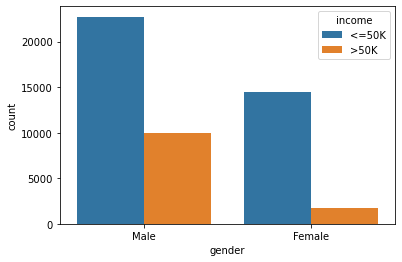

In [37]:
sns.countplot( x = 'gender', hue = 'income', data = data)

In [38]:
edu = data[data['income'] == '>50K']

<AxesSubplot:xlabel='count', ylabel='education'>

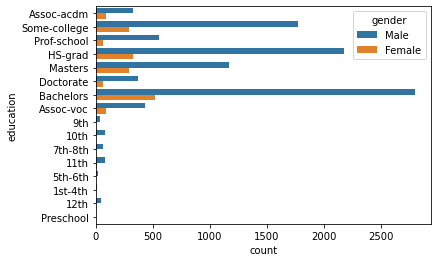

In [39]:
sns.countplot(y = 'education', hue = 'gender', data = edu)

<AxesSubplot:xlabel='count', ylabel='native_country'>

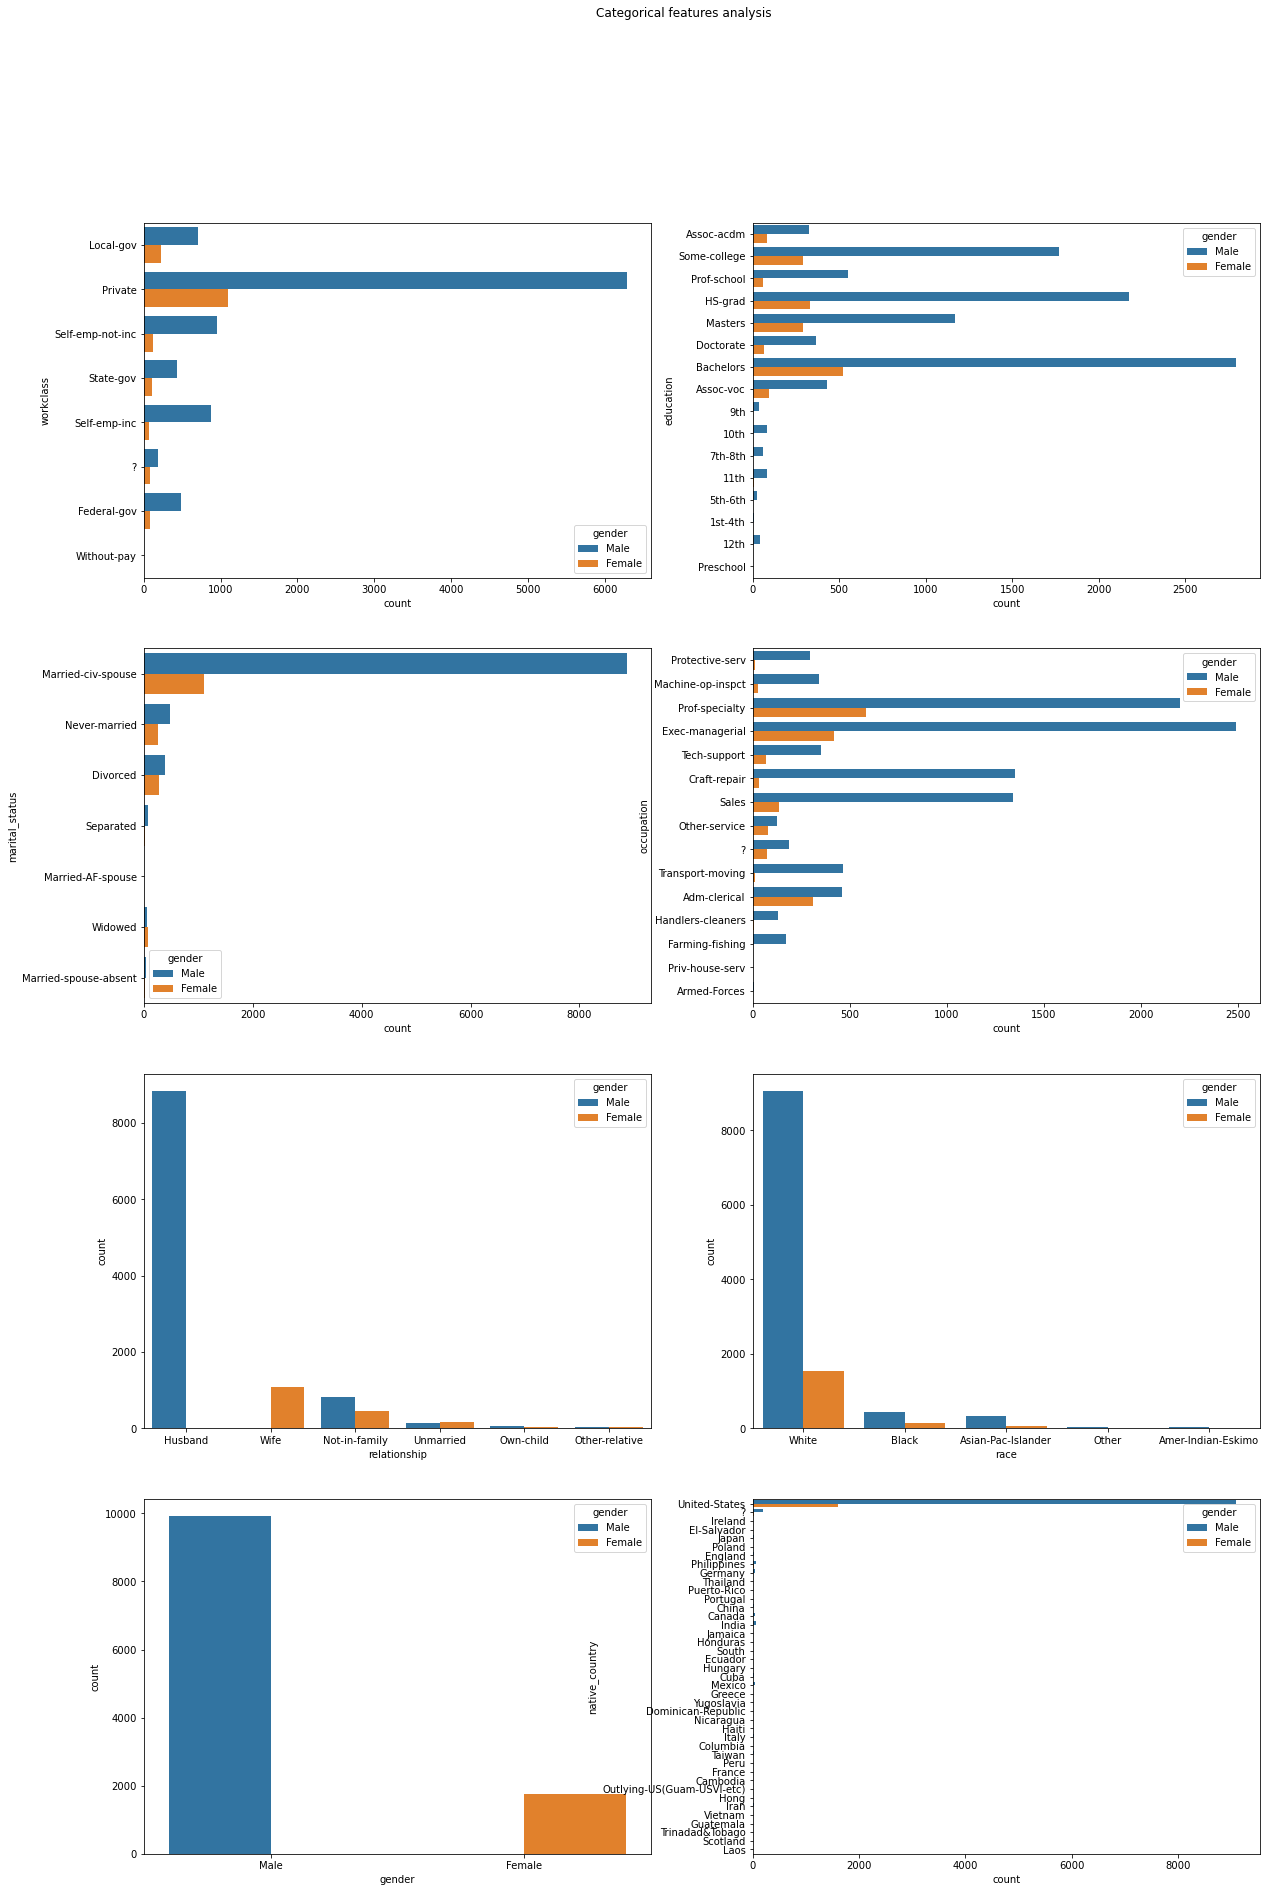

In [40]:
fig, axes = plt.subplots(4, 2, figsize = (20,30))
fig.suptitle('Categorical features analysis')
sns.countplot(ax = axes[0,0], y = 'workclass', hue = 'gender', data = edu)
sns.countplot(ax = axes[0,1], y = 'education', hue = 'gender', data = edu)
sns.countplot(ax = axes[1,0], y = 'marital_status', hue = 'gender', data = edu)
sns.countplot(ax = axes[1,1], y = 'occupation', hue = 'gender', data = edu)
sns.countplot(ax = axes[2,0], x = 'relationship', hue = 'gender', data = edu)
sns.countplot(ax = axes[2,1], x = 'race', hue = 'gender', data = edu)
sns.countplot(ax = axes[3,0], x = 'gender', hue = 'gender', data = edu)
sns.countplot(ax = axes[3,1], y = 'native_country', hue = 'gender', data = edu)

In [ ]:
sns.swarmplot(x = 'educational_num', y = 'gender', data = edu )

In [ ]:
sns.distplot(edu.age)

In [1]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
!pip uninstall numpy
!pip install numpy

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /Users/judith/opt/anaconda3/bin/f2py
    /Users/judith/opt/anaconda3/bin/f2py3
    /Users/judith/opt/anaconda3/bin/f2py3.7
    /Users/judith/opt/anaconda3/lib/python3.7/site-packages/numpy-1.19.5.dist-info/*
    /Users/judith/opt/anaconda3/lib/python3.7/site-packages/numpy/*
Proceed (y/n)? 

In [ ]:
!y

In [2]:
from pmdarima.arima.utils import ndiffs

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject